In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

df=pd.read_csv('D:\\Licenta\\data\\data_AAC_CTD_QuasiSeq_ConjointTriad.csv')
X=df.drop(['Uniprot1','Uniprot2','Sequence','Sequence1','AAC1','AAC2','CTD1','CTD2','ConjointTriad1','ConjointTriad2','QuasiSequenceOrder1','QuasiSequenceOrder2','Type'], axis=1)
y=df["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)
base_model=SVC(class_weight='balanced')
param_grid={'C':[0.001,0.005,0.01,0.05,0.1,0.5,1,10,20],'kernel':['linear','rbf','poly']}
grid=GridSearchCV(base_model,param_grid,verbose=5,n_jobs=8)
grid.fit(scaled_X_train,y_train)
grid.best_params_


Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'C': 20, 'kernel': 'rbf'}

In [2]:
import pickle
filename = 'AAC_CTD_QuasiSeq_ConjointTriad_model.sav'
pickle.dump(grid, open(filename, 'wb'))

In [3]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score, classification_report,confusion_matrix, f1_score, precision_score,recall_score, roc_auc_score

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('D:\\Licenta\\data\\data_AAC_CTD_QuasiSeq_ConjointTriad.csv')
X=df.drop(['Uniprot1','Uniprot2','Sequence','Sequence1','AAC1','AAC2','CTD1','CTD2','ConjointTriad1','ConjointTriad2','QuasiSequenceOrder1','QuasiSequenceOrder2','Type'], axis=1)
y=df["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, shuffle = True)
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)
base_model=SVC(C = 20, kernel = 'rbf', class_weight='balanced', verbose = 5,random_state=101)
base_model.fit(scaled_X_train,y_train)
base_preds=base_model.predict(scaled_X_test)


[LibSVM]

Balanced accuracy: 0.9826365422864294
Classification report :               precision    recall  f1-score   support

    Bacteria       0.98      0.97      0.98      2523
       Virus       0.99      1.00      0.99     10495

    accuracy                           0.99     13018
   macro avg       0.99      0.98      0.99     13018
weighted avg       0.99      0.99      0.99     13018

Confusion matrix: [[ 2445    78]
 [   40 10455]]
F1 score: 0.9909094281793694
Precision: 0.9909102574350935
Recall: 0.9909356275925641
Sensitivity: 0.9961886612672701
Specificity: 0.9690844233055886
MCC: 0.9708693811007091


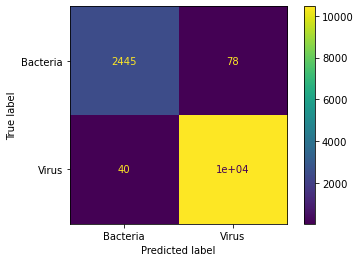

In [4]:
from sklearn.metrics import  plot_confusion_matrix, balanced_accuracy_score, accuracy_score, classification_report,confusion_matrix, f1_score, precision_score,recall_score, roc_auc_score
from sklearn.metrics import matthews_corrcoef

m1=balanced_accuracy_score(y_test, base_preds)
m2=classification_report(y_test, base_preds)
m3=confusion_matrix(y_test, base_preds)
m4=f1_score(y_test, base_preds,average='weighted')
m5=precision_score(y_test, base_preds,average='weighted')
m6=recall_score(y_test, base_preds,average='weighted')
m7=matthews_corrcoef(y_test, base_preds)
tn, fp, fn, tp = confusion_matrix(y_test, base_preds).ravel()
specificity = tn / (tn+fp) 
sensitivity = tp / (tp+fn)
print("Balanced accuracy: "+str(m1))
print("Classification report : "+str(m2))
print("Confusion matrix: "+str(m3))
print("F1 score: "+str(m4))
print("Precision: "+str(m5))
print("Recall: "+str(m6))
print("Sensitivity: "+str(sensitivity))
print("Specificity: "+str(specificity))
print("MCC: "+str(m7))
plot_confusion_matrix(base_model,scaled_X_test,y_test)

[learning_curve] Training set sizes: [ 3037  6074  9112 12149 15187 18224 21261 24299 27336 30374]


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  33 out of 100 | elapsed: 33.0min remaining: 67.1min
[Parallel(n_jobs=8)]: Done  67 out of 100 | elapsed: 66.8min remaining: 32.9min
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed: 103.0min finished


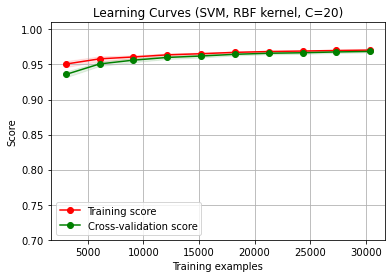

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,verbose=3)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (SVM, RBF kernel, C=20)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=101)
model_new = SVC(C = 20, kernel = 'rbf', class_weight='balanced')
df=pd.read_csv('D:\\Licenta\\data\\data_AAC_CTD_QuasiSeq_ConjointTriad.csv')
X=df.drop(['Uniprot1','Uniprot2','Sequence','Sequence1','AAC1','AAC2','CTD1','CTD2','ConjointTriad1','ConjointTriad2','QuasiSequenceOrder1','QuasiSequenceOrder2','Type'], axis=1)
y=df["Type"]
plot_learning_curve(model_new, title, X, y, (0.7, 1.01), cv=cv, n_jobs=8)

plt.show()


In [ ]:
import pickle
import pandas as pd
grid = pickle.load(open('QuasiSequenceOrde_model.sav', 'rb'))
score = pd.DataFrame(grid.cv_results_)
score.to_csv('D:\\Licenta\\data\\gridsearchresults_QuasiSequenceOrde_SVM.csv')